In [1]:
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_id=train['Id']
test_id=test['Id']

In [10]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [13]:
#Outliers
from ggplot import *

/Users/prabha/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/prabha/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/prabha/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


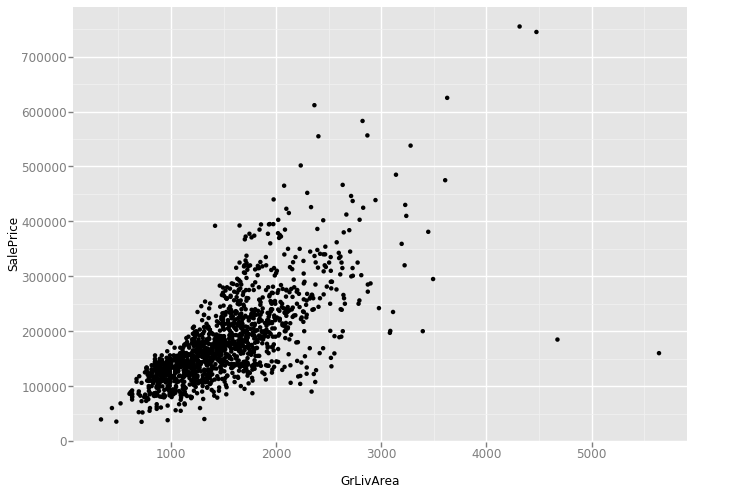

<ggplot: (287162828)>

In [24]:
ggplot(train,aes(y='SalePrice',x='GrLivArea'))+geom_point()

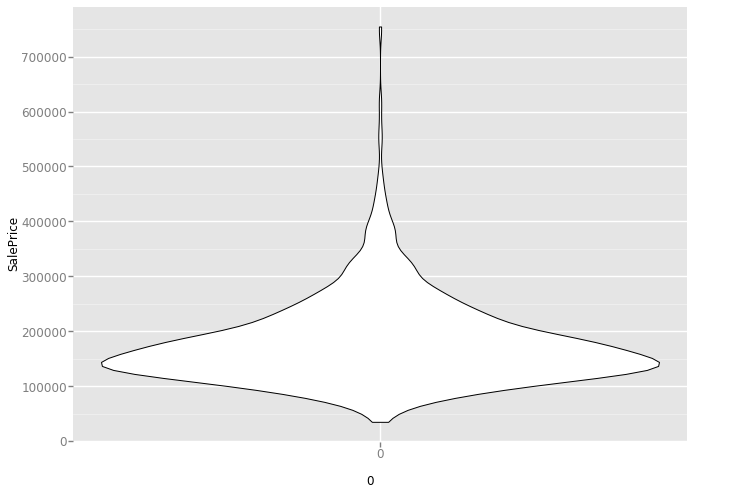

<ggplot: (282074148)>

In [25]:
ggplot(train,aes(x=('0'),y='SalePrice'))+geom_violin()

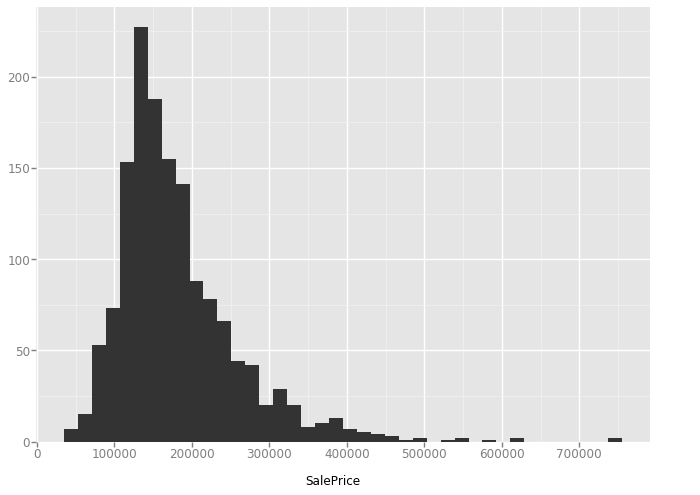

<ggplot: (293101979)>

In [44]:
ggplot(train,aes(x='SalePrice'))+geom_histogram(bins=40,colour='Red')

In [49]:
print('mean :%.2f , sd: %.2f'%(np.mean(train.SalePrice),np.std(train.SalePrice)))

mean :180921.20 , sd: 79415.29


In [50]:
#target variable is right skewed,so use log transformation

train['SalePrice']=np.log1p(train['SalePrice'])

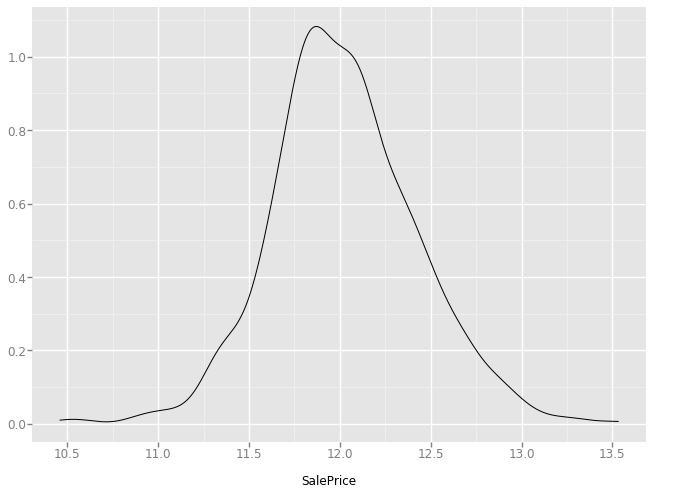

<ggplot: (-9223372036561200142)>

In [55]:
ggplot(train,aes(x='SalePrice'))+geom_density()

In [ ]:
#Now seems normally distributed

In [57]:
#Feature Engineering

ntrain=train.shape[0]
ntest=test.shape[0]

In [60]:
y_train=train.SalePrice.values

In [72]:
all_data=pd.concat([train,test]).reset_index(drop=True)

In [74]:
all_data.drop('SalePrice',axis=1,inplace=True)

In [75]:
all_data.shape

(2919, 79)

In [86]:
#Missing Ratios

missing_ratio=(all_data.isnull().sum()/all_data.shape[0])*100
missing_ratio.sort_values(ascending=False,inplace=True)

In [87]:
missing_ratio=pd.DataFrame({'MissingRatio':missing_ratio})

In [90]:
missing_ratio=missing_ratio[missing_ratio['MissingRatio']>0]

In [93]:
missing_ratio.reset_index(inplace=True)

In [143]:
missing_ratio.sort_values(by='MissingRatio',ascending=False)

,index,MissingRatio
0,PoolQC,99.657417
1,MiscFeature,96.402878
2,Alley,93.216855
3,Fence,80.438506
4,FireplaceQu,48.646797
5,LotFrontage,16.649538
6,GarageFinish,5.447071
7,GarageQual,5.447071
8,GarageYrBlt,5.447071
9,GarageCond,5.447071


In [136]:
from plotnine import *

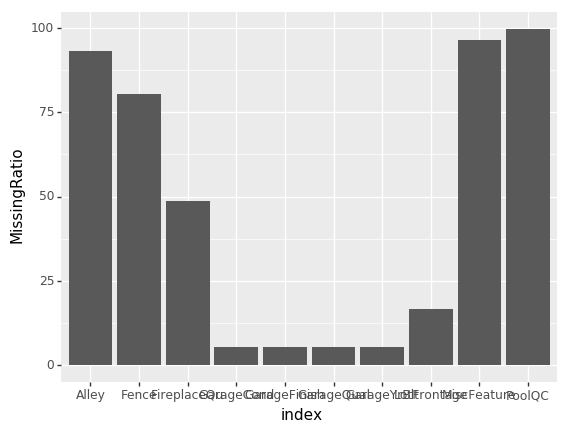

<ggplot: (-9223372036556973224)>

In [145]:
ggplot(missing_ratio[:10],aes(x='index',y='MissingRatio'))+geom_bar(stat = "identity")

In [147]:
corr=train.corr()

In [148]:
import seaborn as sns

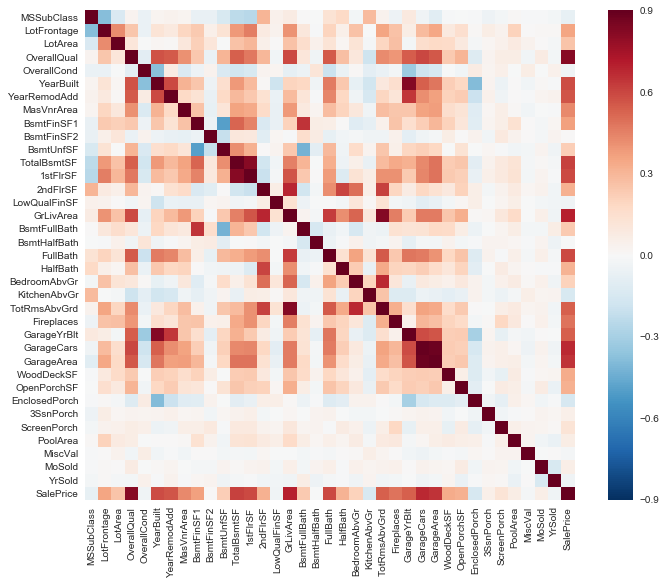

In [152]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=.9,square=True)
plt.show()

In [157]:
top_5_missing_feat=list(missing_ratio['index'].values[:5])

In [159]:
all_data[top_5_missing_feat]=all_data[top_5_missing_feat].fillna('None')

In [162]:
#LotFrontage : Since the area of each street connected to the house property most likely have a 
#similar area to other houses in its neighborhood , 
#we can fill in missing values by the median LotFrontage of the neighborhood.

In [179]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [184]:
all_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]=\
all_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

In [185]:
all_data[['GarageYrBlt', 'GarageArea', 'GarageCars']]=\
all_data[['GarageYrBlt', 'GarageArea', 'GarageCars']].fillna(0)

In [188]:
#Missing Ratios

missing_ratio=(all_data.isnull().sum()/all_data.shape[0])*100
missing_ratio.sort_values(ascending=False,inplace=True)
missing_ratio

BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
Utilities        0.068517
Functional       0.068517
BsmtHalfBath     0.068517
Electrical       0.034258
KitchenQual      0.034258
BsmtUnfSF        0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
TotalBsmtSF      0.034258
Foundation       0.000000
Fireplaces       0.000000
FullBath         0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.000000
FireplaceQu      0.000000
Fence            0.000000
YrSold           0.000000
                   ...   
PavedDrive       0.000000
PoolArea         0.000000
PoolQC           0.000000
RoofStyle        0.000000
MoSold           0.000000
SaleCondition    0.000000
ScreenPorch      0.000000
Street      

In [189]:
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]=\
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [190]:
missing_ratio=(all_data.isnull().sum()/all_data.shape[0])*100
missing_ratio.sort_values(ascending=False,inplace=True)
missing_ratio

BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Utilities        0.068517
Functional       0.068517
Exterior2nd      0.034258
KitchenQual      0.034258
Electrical       0.034258
Exterior1st      0.034258
SaleType         0.034258
GarageCond       0.000000
GarageCars       0.000000
ExterQual        0.000000
FullBath         0.000000
Fence            0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
GarageArea       0.000000
ExterCond        0.000000
Foundation       0.000000
YrSold           0.000000
Condition2       0.000000
EnclosedPorch    0.000000
GarageQual       0.000000
Condition1       0.000000
                   ...   
PoolArea         0.000000
PoolQC           0.000000
RoofMatl         0.000000
RoofStyle        0.000000
SaleCondition    0.000000
ScreenPorch      0.000000
Street           0.000000
TotRmsAbvGrd

In [191]:
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]=\
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna(0)

In [193]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

In [194]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

In [198]:
all_data['MSSubClass']=all_data['MSSubClass'].fillna(all_data['MSSubClass'].mode()[0])

In [200]:
all_data.drop('Utilities',axis=1,inplace=True)

In [201]:
all_data['Functional']=all_data['Functional'].fillna('Typ')

In [203]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [204]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [205]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [207]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [208]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [213]:
missing_ratio=(all_data.isnull().sum()/all_data.shape[0])*100
missing_ratio.sort_values(ascending=False,inplace=True)
missing_ratio[missing_ratio>0]

Series([], dtype: float64)

In [222]:
#More Featured engineering

all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['OverallCond']=all_data['OverallCond'].astype(str)

all_data[['YrSold','MoSold']]=all_data[['YrSold','MoSold']].astype(str)

In [223]:
all_data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


In [226]:
all_data['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [230]:
for c in cols:
    lbl=LabelEncoder()
    all_data[c]=lbl.fit_transform(list(all_data[c].values))

In [231]:
all_data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,0.985612,2.860226,3.695444,3.187050,441.272011,49.565262,3.657417,...,2.251799,2.993148,16.062350,0.995889,6.451524,1051.417266,93.709832,1971.312778,1984.264474,1.792737
std,392.362079,428.701456,25.188169,0.260092,0.822693,0.920085,1.240159,455.606014,169.179104,1.887826,...,35.663946,0.128073,56.184365,0.063996,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000
25%,876.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,...,0.000000,3.000000,0.000000,1.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,1.000000
50%,1082.000000,0.000000,0.000000,1.000000,3.000000,4.000000,4.000000,368.000000,0.000000,3.000000,...,0.000000,3.000000,0.000000,1.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2.000000
75%,1387.500000,704.000000,0.000000,1.000000,3.000000,4.000000,4.000000,733.000000,0.000000,6.000000,...,0.000000,3.000000,0.000000,1.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,3.000000
max,5095.000000,2065.000000,508.000000,2.000000,8.000000,4.000000,4.000000,5644.000000,1526.000000,6.000000,...,800.000000,3.000000,576.000000,1.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,4.000000


In [232]:
#Adding total sqfootage feature

all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [233]:
#Skewed Features

In [240]:
numeric_feat=all_data.dtypes[all_data.dtypes!='object'].index

In [243]:
from scipy.stats import norm,skew

In [254]:
skew(np.random.normal(0,0.1,1000000))

-0.00047793179001386505

In [269]:
skewed_feature=all_data[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [271]:
skewness=pd.DataFrame({'skew':skewed_feature})

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'TotalSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1',
       'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'Fireplaces', 'HalfBath', 'BsmtFullBath', 'OverallCond', 'HeatingQC',
       'FireplaceQu', 'BedroomAbvGr', 'GarageArea', 'OverallQual', 'FullBath',
       'MSSubClass', 'YrSold', 'BsmtFinType1', 'GarageCars', 'YearRemodAdd',
       'YearBuilt', 'GarageFinish', 'LotShape', 'MoSold', 'Alley',
       'BsmtExposure', 'BsmtQual', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'Functional', 'Street',
       'PoolQC'],
      dtype='object')

In [280]:
skewness=skewness[abs(skewness)>.75]

In [281]:
skewness.shape

(59, 1)

In [282]:
skewed_feat=skewness.index

In [286]:
from scipy.special import boxcox1p
lam=.5

for feat in skewed_feat:
    all_data[feat]=boxcox1p(all_data[feat],lam)

In [287]:
#Getting dummy categorical features

In [288]:
all_data=pd.get_dummies(all_data)

In [289]:
all_data.shape

(2919, 221)

In [290]:
train=all_data[:ntrain]
test=all_data[ntrain:]

In [292]:
test.shape

(1459, 221)

In [297]:
#Modeling 
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [294]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [295]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [298]:
score = rmsle_cv(model_xgb)

In [299]:
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1228 (0.0092)

